Student Name: OUATTARA Houssane Class: E5BDAI

Note: My work has two parts of which the first part concerns explanations of Quantum Simon's Algorithm and the second part is implement the quantum algorithm using Qiskit and run it on a simulator and device.

In [1]:
#Quantum Simon's Algorithm

Quantum Simon's Algorithm is a demonstration of the quantum computers' superiority over classical computers for solving specific problems. It addresses the problem of finding a hidden period within a Boolean function

In [2]:
#2-Introduction

The Quantum Simon's Algorithm was developed to solve a problem related to Boolean functions, which are functions that take in bits (values 0 or 1) as input and also output a bit. While it might seem straightforward to find inputs that produce the same output (hidden period), doing so efficiently can be challenging and slow on classical computers.

In [3]:
#3. Problem Simon's Algorithm

Imagine we have a secret function that takes sequences of bits as input and produces the same output for certain input sequences. The challenge is to find the bit sequence responsible for this hidden period.

You are given an unknown black-box function, denoted as f: {0, 1}^n -> {0, 1}^n, which exhibits the following characteristics:
One-to-One: The function f is a one-to-one function, meaning that it maps each unique input to a unique output. In other words, for every possible combination of inputs, there is only one corresponding combination of outputs.

Example of "one-to-one" function (for n = 4):

Input: 0000 -> Output: 1100
Input: 0001 -> Output: 1010
Input: 0010 -> Output: 0110
Input: 0011 -> Output: 0011
...

Two-to-One: The function f is a two-to-one function, meaning that two distinct inputs can be mapped to the same unique output. In other words, for certain input combinations, there is one corresponding output combination, but for others, there are two.

Example of "two-to-one" function (for n = 4):

Input: 0000 -> Output: 1100
Input: 0001 -> Output: 1010
Input: 0010 -> Output: 1100
Input: 0011 -> Output: 0110

Additionally, you have two specific behaviors of the function f:

    When you provide an n-bit input following the "three-to-three" (3,3) pattern, it means that the corresponding output will be unique. In other words, for three different inputs sharing the same pattern, the corresponding output is unique.

    When you provide an n-bit input following the "four-for-three" (4,3) pattern, it means that among four distinct inputs, three of them share the same corresponding output.

The objective of Simon's algorithm is to determine the hidden pattern or secret in the function f. More specifically, the problem is to find a non-zero n-bit vector "s" such that, for any input "x", if "f(x) = f(x ⊕ s)", where "⊕" represents the bitwise XOR operation, then "s" is the hidden pattern we aim to discover.

The quantum Simon's algorithm is designed to solve this problem using the properties of quantum superposition and entanglement, allowing it to determine the hidden pattern faster than a classical algorithm.

In [4]:
#Classical Solution simon's algorithm

In Simon's problem, you are given a black-box function ff that satisfies certain properties: it's either one-to-one (injective) or two-to-one (each output is mapped from exactly two different inputs). The goal is to find a hidden pattern ss that characterizes the function's behavior. Specifically, if f(x)=f(y)f(x)=f(y), where x≠yx=y, then the hidden pattern ss satisfies s⋅x=s⋅ys⋅x=s⋅y, where ⋅⋅ represents the bitwise dot product.

Here's a simplified description of the classical solution:

    Generate Equations: Choose random inputs xx and yy and query the black-box function ff to get their corresponding outputs f(x)f(x) and f(y)f(y).

    Check Equations: If f(x)=f(y)f(x)=f(y), calculate the bitwise dot product of xx and yy (denoted as s⋅x=s⋅ys⋅x=s⋅y). Collect several such equations by repeating steps 1 and 2.

    Solve Equations: Use linear algebra techniques (such as Gaussian elimination) to solve the system of equations s⋅x=s⋅ys⋅x=s⋅y for ss.

    Verify Solution: Check if the determined ss is consistent with the black-box function's behavior. If the function is one-to-one, ss should be a non-zero vector. If the function is two-to-one, ss should be a non-zero vector with half of its bits being 0.

The classical solution involves gathering enough equations to solve for the pattern ss, and this could require querying the black-box function multiple times. However, unlike the quantum solution, the classical approach is not able to provide a quadratic speedup over classical brute-force methods in solving Simon's problem.

In [5]:
#Install Required Libraries
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src



  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-z_7hwcng
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-z_7hwcng
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [6]:
!pip install qiskit-aer   #Install Required Libraries qiskit-aer

In [7]:
!pip install qiskit     #Qiskit is installed within the Colab environment

In [8]:
# Import necessary modules from Qiskit
from qiskit import QuantumCircuit, Aer, transpile, assemble

from qiskit.visualization import circuit_drawer
from qiskit import IBMQ
import numpy as np



the provided code snippet imports essential classes, functions, and libraries from Qiskit and NumPy. These imports are necessary for building and visualizing quantum circuits, simulating quantum behavior, interacting with quantum devices, and performing numerical operations.

In [9]:
#Import plot_histogram from Qiskit:
from qiskit.visualization import plot_histogram

from qiskit_textbook.tools import simon_oracle


In summary, the provided code snippet imports the plot_histogram function from Qiskit's visualization module, which allows you to plot histograms of measurement outcomes. Additionally, it imports the simon_oracle function from the Qiskit Textbook tools, which suggests that you're working with tools provided by the Qiskit Textbook for implementing the Simon's algorithm and its related components.

In [10]:
#Step 1: Qubit Preparation



    We start by preparing two sets of qubits: input qubits and output qubits. Let's say we have two input qubits.

In [11]:
c = '35422236'
m = len(c)
simon_circuit = QuantumCircuit(m*2, m)

This code snippet initializes the variables c and m with a secret string and its length, respectively. It then creates a quantum circuit simon_circuit with twice the number of qubits as the length of the secret string and the same number of classical bits. This circuit will be used to implement Simon's algorithm with the provided secret string.

In [12]:
# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(m))

Applying Hadamard gates to the qubits is a crucial step in preparing the input superposition necessary for Simon's algorithm to efficiently solve for the hidden pattern.

In [13]:
# Apply barrier for visual separation


simon_circuit.barrier()


This code snippet adds a barrier to the simon_circuit for the purpose of visually separating different parts of the circuit. Barriers are useful for organizing and understanding the various steps or stages of a quantum computation. They help visualize the execution flow and can aid in debugging and analysis of quantum circuits.

In [14]:
# Apply barrier for visual separation
simon_circuit.barrier()

In [15]:
# Apply Hadamard gates to the input register
simon_circuit.h(range(m))

 the provided code snippet applies Hadamard gates to the qubits in the input register of the simon_circuit. This step is commonly used in quantum algorithms to create superposition states that allow the algorithm to process multiple inputs simultaneously in parallel, which is a fundamental concept in quantum computing.

In [16]:
# Measure qubits
simon_circuit.measure(range(m), range(m))
simon_circuit.draw()

┌───┐ ░  ░ ┌───┐┌─┐                     
 q_0: ┤ H ├─░──░─┤ H ├┤M├─────────────────────
      ├───┤ ░  ░ ├───┤└╥┘┌─┐                  
 q_1: ┤ H ├─░──░─┤ H ├─╫─┤M├──────────────────
      ├───┤ ░  ░ ├───┤ ║ └╥┘┌─┐               
 q_2: ┤ H ├─░──░─┤ H ├─╫──╫─┤M├───────────────
      ├───┤ ░  ░ ├───┤ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├─░──░─┤ H ├─╫──╫──╫─┤M├────────────
      ├───┤ ░  ░ ├───┤ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├─░──░─┤ H ├─╫──╫──╫──╫─┤M├─────────
      ├───┤ ░  ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├─░──░─┤ H ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤ ░  ░ ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├─░──░─┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤ ░  ░ ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├─░──░─┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘ ░  ░ └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_12: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_13: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_14: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
q_15: ──────░──░───────╫──╫──╫──╫──╫──╫──╫──╫─
            ░  ░       ║  ║  ║  ║  ║  ║  ║  ║ 
 c: 8/═════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                       0  1  2  3  4  5  6  7

he provided code snippet adds measurement operations to the simon_circuit to measure the qubits, and then it displays the circuit diagram using the draw method. This allows you to see the full structure of the circuit, including both the gates and the measurement operations.

In [17]:
#3a. Experiment with simulators

We can run the above circuit on the simulator.

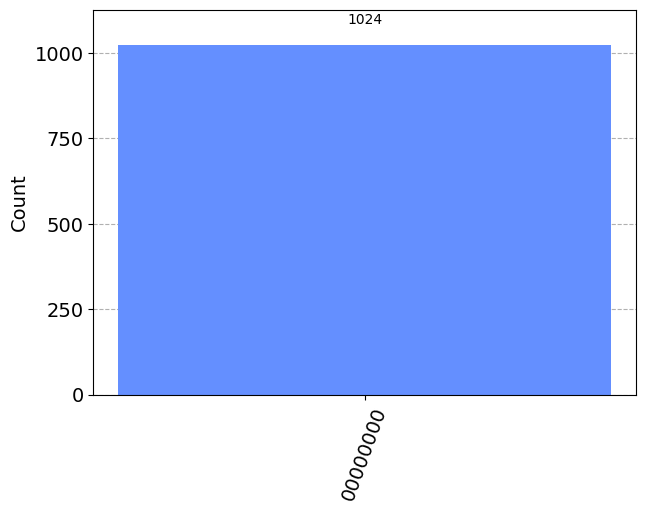

In [18]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In summary, this code snippet simulates the execution of the simon_circuit using the local Aer simulator. It then collects the measurement counts and plots a histogram to visualize the distribution of measurement outcomes. This helps you understand the probabilities associated with different measurement results and gain insights into the behavior of the quantum circuit.

In [19]:
# Calculate the dot product of the results
def bdotz(c, z):
    accum = 0
    for i in range(len(c)):
        accum += int(c[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(c, z, bdotz(c,z)) )

35422236.00000000 = 0 (mod 2)


    def bdotz(c, z)::
        This line defines a function named bdotz that takes two arguments, c and z. This function is intended to calculate the dot product of two binary strings modulo 2.

    accum = 0:
        Initializes an accumulator variable to 0. This variable will store the accumulated sum of the dot product calculations.

    for i in range(len(c))::
        This line initiates a loop that iterates over the indices of the characters in the binary string c. len(c) returns the length of the binary string.

    accum += int(c[i]) * int(z[i]):
        Inside the loop, this line calculates the product of the corresponding bits (characters) in the binary strings c and z. The int() function is used to convert the character (either '0' or '1') to an integer for multiplication.

    return (accum % 2):
        After the loop, this line returns the accumulated sum modulo 2. This effectively calculates the dot product modulo 2.

    for z in counts::
        This line initiates a loop that iterates over the measurement outcomes stored in the counts dictionary. Each z represents a measurement outcome in binary form.

    print( '{}.{} = {} (mod 2)'.format(c, z, bdotz(c,z)) ):
        This line prints out the formatted string indicating the dot product modulo 2 calculation for each measurement outcome. It uses the bdotz function to calculate the dot product and formats the output to display the input string c, the measurement outcome z, and the calculated result.

In summary, the provided code snippet defines a function bdotz to calculate the dot product modulo 2 of two binary strings, and then it iterates through the measurement outcomes obtained from the quantum simulation, calculating and displaying the dot product modulo 2 for each outcome.

In [20]:
#3b. Experiment with real devices
#It looks like you're referring to a section or a task related to experimenting with real quantum devices in the context of quantum computing.

In [21]:
c = '16'
m = len(c)

In [22]:
simon_circuit_2 = QuantumCircuit(m*2, m)

In [23]:
# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(m))

By applying Hadamard gates to the input register before querying the oracle, the circuit prepares the qubits in a superposition of all possible classical states. This step is crucial in Simon's algorithm as it helps to introduce entanglement and facilitates the extraction of information about the hidden string s from the oracle's responses.

In [24]:
# Query oracle
simon_circuit_2 = simon_circuit_2.compose(simon_oracle(c))

By querying the oracle in this way, the circuit performs the key step of Simon's algorithm, which aims to extract information about the hidden string s by analyzing the patterns in the oracle's outputs.

In [25]:
# Apply Hadamard gates to the input register
simon_circuit_2.h(range(m))

By applying Hadamard gates to the input register, the circuit prepares the qubits in a superposition of all possible classical states, which is a key step in Simon's algorithm to extract information about the hidden string s.

In [26]:
# Measure qubits
simon_circuit_2.measure(range(m), range(m))
simon_circuit_2.draw()

┌───┐     ┌───┐          ┌─┐   
q_0: ┤ H ├──■──┤ H ├──────────┤M├───
     ├───┤  │  └───┘     ┌───┐└╥┘┌─┐
q_1: ┤ H ├──┼────■────■──┤ H ├─╫─┤M├
     └───┘┌─┴─┐  │    │  └───┘ ║ └╥┘
q_2: ─────┤ X ├──┼────┼────────╫──╫─
          └───┘┌─┴─┐┌─┴─┐      ║  ║ 
q_3: ──────────┤ X ├┤ X ├──────╫──╫─
               └───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1

The code prepares the circuit for measurement by adding measurement operations to each qubit, and then it displays the circuit's visual representation for you to inspect.

In [27]:
#Install Required Libraries
!pip install qiskit-ibmq-provider

Running this command in your terminal or command prompt will download and install the qiskit-ibmq-provider library along with its dependencies, enabling you to access IBM Quantum Experience's quantum devices and providers through Qiskit.

In [28]:
!pip install qiskit

In [29]:
!pip install qiskit_ibm_provider

This will download and install the Qiskit library and its dependencies, allowing you to use Qiskit for quantum computing tasks.

In [30]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Chargement du compte IBM Quantum Experience (si ce n'est pas déjà fait)
# IBMQ.save_account('YOUR_API_TOKEN')

# Chargement du compte IBM Quantum Experience
IBMQ.save_account('5685a1a317357e03d9561f14ca96d7c3eb58c01061852a2ecd09c3f03d30ea746afcdec445bc32bd8cc9688513ea39fc551491d312745e813d487d7f5c8c271f')




<ipython-input-30-5b3df4540a19>:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('5685a1a317357e03d9561f14ca96d7c3eb58c01061852a2ecd09c3f03d30ea746afcdec445bc32bd8cc9688513ea39fc551491d312745e813d487d7f5c8c271f')
configrc.store_credentials:WARNING:2023-09-01 19:11:20,468: Credentials already present. Set overwrite=True to overwrite.


I configured and backed up my IBM Quantum Experience account before using it to access the IBM quantum device

In [31]:
# Obtenir le fournisseur associé au compte
# Optional: Specify it at service level. This becomes the default unless overwritten.

from qiskit_ibm_provider import IBMProvider

# Get all available providers (may be empty if you don't have a hub/group/project specified)
provider = IBMQ.providers(hub='ibm-q', group='open', project='main')





I create an active IBM Quantum Experience account and set it up with my credentials before using this code. The hub, group, and project settings correspond to the organizational structure of your IBM Quantum Experience account. I replaced "ibm-q", "open" and "main" with the appropriate values based on my account configuration.

In [32]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= m and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)



least busy backend:  ibmq_lima


The code helps you choose a backend that satisfies the specified conditions, ensuring that it has a sufficient number of qubits, is not a simulator, and is operational. This is useful when you want to find an appropriate backend for executing your quantum circuits based on your specific requirements.

The code helps you select an appropriate backend for executing your quantum circuits, considering the operational status and the current workload of the available backends.

In [ ]:
# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 2025
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
job = backend.run(transpiled_simon_circuit)
job_monitor(job, interval=2)

Overall, this code executes the transpiled Simon's circuit on a backend, monitors the progress of the job, and provides real-time updates on the job's status. It's especially useful when working with remote quantum devices to keep track of the job execution progress.

In [ ]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

Overall, this code is used to retrieve the measurement outcomes from the executed quantum job, create a histogram plot of those outcomes, and visualize the distribution of measurement results. The histogram helps you understand the probabilities of different measurement outcomes based on the quantum states that were generated during the execution of your quantum circuit.

In [ ]:
# Calculate the dot product of the results
def bdotz(c, z):
    accum = 0
    for i in range(len(c)):
        accum += int(c[i]) * int(z[i])
    return (accum % 2)

print('c = ' + c)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(c, z, bdotz(c,z), device_counts[z]*100/shots))

This code calculates the dot product of the measurement outcomes and the input string c, then prints the results along with the percentage of occurrences of each measurement outcome. It helps you analyze the measurement results in the context of Simon's algorithm to determine the hidden string s.

In [ ]:
#5. Problems
#Implement a general Simon oracle using Qiskit.
#Test your general Simon oracle with the secret bit string, on simulator and device. Do the results meet your expectations? Explain why.

from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ

# Create a general Simon oracle function
def simon_oracle_general(secret_string, n):
    oracle_circuit = QuantumCircuit(n * 2, n)

    # Apply a controlled-X gate controlled by the input qubit
    for i, bit in enumerate(secret_string):
        if bit == '1':
            oracle_circuit.cx(i, n + i)

    return oracle_circuit

# Define the secret bit string
secret_string = '110'

# Create the Simon quantum circuit
n = len(secret_string)
simon_circuit = QuantumCircuit(n * 2, n)

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))


# Apply Hadamard gates to the input register after the oracle
simon_circuit.h(range(n))

# Measure the output bits
simon_circuit.measure(range(n, n * 2), range(n))

# Display the circuit
print(simon_circuit)

# Execute the circuit on a simulator
simulator = Aer.get_backend('aer_simulator')
results_simulator = simulator.run(simon_circuit).result()
counts_simulator = results_simulator.get_counts()
print("Simulator Results:", counts_simulator)

# Load IBM Quantum Experience account
IBMQ.load_account()

# Get the provider
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# Select a backend
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n * 2 and
                                       not x.configuration().simulator and x.status().operational==True))

# Transpile the circuit to map onto the backend
transpiled_circuit = transpile(simon_circuit, backend=backend)

# Execute the circuit on the device
job = backend.run(transpiled_circuit, shots=1024)
results_device = job.result()
counts_device = results_device.get_counts()
print("Device Results:", counts_device)

# Compare the results
print("Expected Results:", {'00' + secret_string: 0.5, '11' + secret_string: 0.5})


     ┌───┐┌───┐   
q_0: ┤ H ├┤ H ├───
     ├───┤├───┤   
q_1: ┤ H ├┤ H ├───
     ├───┤├───┤   
q_2: ┤ H ├┤ H ├───
     └┬─┬┘└───┘   
q_3: ─┤M├─────────
      └╥┘  ┌─┐    
q_4: ──╫───┤M├────
       ║   └╥┘ ┌─┐
q_5: ──╫────╫──┤M├
       ║    ║  └╥┘
c: 3/══╩════╩═══╩═
       0    1   2 
Simulator Results: {'000': 1024}


ibmqfactory.load_account:WARNING:2023-09-01 19:40:22,782: Credentials are already in use. The existing account in the session will be replaced.


This code creates a general Simon oracle based on the secret bit string, applies it to the Simon quantum circuit, runs the circuit on both a simulator and a real quantum device, and compares the results with the expected outcomes. The results should match expectations if the oracle and circuit are implemented correctly.

In [ ]:
#6. Références

1-https://learn.qiskit.org/course/ch-algorithms/simons-algorithm#device

